Start by installing https://github.com/CS-SI/eodag, https://github.com/CS-SI/eodag-sentinelsat, and https://github.com/CS-SI/eodag-labextension in a virtual environment. Launch jupyter lab.

In your virtual environment root folder, you'll need to have a config file with credentials at ~/.config/eodag/eodag.yml, similar to:

In [1]:
from eodag import EODataAccessGateway, setup_logging
import os

# create workspace for downloaded data
workspace = 'eodag_workspace_overview'
if not os.path.isdir(workspace):
    os.mkdir(workspace)


setup_logging(1) # 0: nothing, 1: only progress bars, 2: INFO, 3: DEBUG

dag = EODataAccessGateway()

In [2]:
available_providers = dag.available_providers()

In [3]:
dag.get_preferred_provider()

('scihub', 2)

In [4]:
dag.available_providers("S1_SAR_GRD")

['astraea_eod',
 'aws_eos',
 'creodias',
 'mundi',
 'onda',
 'peps',
 'scihub',
 'sobloo']

In [5]:
catalog = dag.list_product_types()

In [6]:
products_id = [p["ID"] for p in catalog]

In [7]:
scihub_products = dag.list_product_types("scihub")
[p["ID"] for p in scihub_products]

['S1_SAR_GRD',
 'S1_SAR_OCN',
 'S1_SAR_SLC',
 'S2_MSI_L1C',
 'S2_MSI_L2A',
 'S3_EFR',
 'S3_ERR',
 'S3_LAN',
 'S3_OLCI_L2LFR',
 'S3_OLCI_L2LRR',
 'S3_SLSTR_L1RBT',
 'S3_SLSTR_L2LST']

In [8]:
import fiona

In [9]:
geom_col = fiona.open("../vectors/S1A_IW_GRDH_1SDV_20211013T064329_20211013T064354_040097_04BF7D_66FF.geojson")

In [10]:
import shapely as shp

multipoly = shp.geometry.shape(geom_col[0]["geometry"])

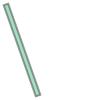

In [11]:
multipoly.minimum_rotated_rectangle

In [12]:
#geometry = "POLYGON ((3.114044 41.734689,6.659244 41.734689,6.659244 43.68593,3.114044 43.68593,3.114044 41.734689))"
search_results, total_count = dag.search(
  productType="S1_SAR_GRD",
  geom=multipoly.minimum_rotated_rectangle,
  start="2021-10-09",
  end="2021-10-18",
  polarization = "VV"
)

In [13]:
total_count

5

In [14]:
iw_search_results = []
for i in search_results:
    if "IW" in i.as_dict()["id"]:
        iw_search_results.append(i)

In [15]:
len(iw_search_results)

5

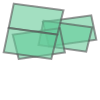

In [16]:
from shapely.geometry import GeometryCollection

features = GeometryCollection(
    [product.geometry for product in iw_search_results]
)
features

In [17]:
fill_f = lambda x: {'fillColor': '#ff00ff'}

Best matches

In [18]:
iw_search_results[-3]

EOProduct(id=S1A_IW_GRDH_1SDV_20211012T184344_20211012T184409_040090_04BF3B_7FB2, provider=scihub)

In [19]:
-3, -13

(-3, -13)

In [20]:
-1,-3,-7, -8, -12, -9, -10, 

(-1, -3, -7, -8, -12, -9, -10)

In [21]:
from folium import Map, GeoJson, Figure

ext = features.bounds
bounds = [[ext[1], ext[0]], [ext[3], ext[2]]]
m = Map(tiles="Stamen Terrain", control_scale=True,)
GeoJson(search_results).add_to(m)
GeoJson(iw_search_results[4].geometry, style_function=fill_f).add_to(m)
m.fit_bounds(bounds)
Figure(width=1000, height=600).add_child(m)

In [23]:
product_to_download = iw_search_results[4]
product_path = dag.download(product_to_download, unzip=False)
#dag.download_all(product_to_download, outputs_prefix="downloaded")

0.00B [00:00, ?B/s]

MD5 checksumming:   0%|                              | 0.00/699M [00:00<?, ?B/s]

0file [00:00, ?file/s]

In [ ]:
dag.download??

In [ ]:
dag.download_all??

In [ ]:
dag.download_all(iw_search_results)

In [67]:
product_path

'/tmp/S1A_IW_GRDH_1SDV_20211019T183541_20211019T183606_040192_04C2BD_3FB3/S1A_IW_GRDH_1SDV_20211019T183541_20211019T183606_040192_04C2BD_3FB3.SAFE'